# Emitter/Receiver Simulation with Signals

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import os
import sys
# Append parent directory to import path so lib can be found
sys.path.append(os.path.dirname(os.path.abspath(os.getcwd())))

#### Signal

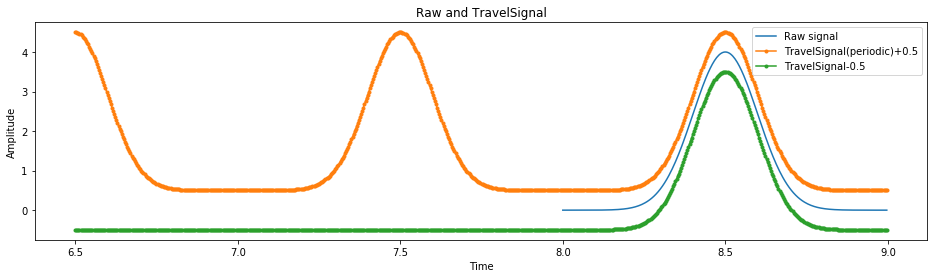

In [2]:
from lib import TravelSignal

####
from scipy.stats import norm

sample_rate = 3e2 # Hz
interp_sample_rate = sample_rate * 1/10 # Hz

t_offset = 8
periodic = False

time   = t_offset + np.arange(0, 1, 1/sample_rate) #s
time2  = t_offset + np.arange(-1.5, 1, 1/sample_rate) #s

signal = norm.pdf(time, time[len(time)//2], (time[-1] - time[0])/10)

if True:
    mysignal = TravelSignal(signal, sample_rate, t_0 = t_offset, periodic=True)
    mysignal2 = TravelSignal(signal, sample_rate, t_0 = t_offset, periodic=False)

    fig, ax = plt.subplots(1, 1, figsize=(16,4))
    ax.set_title("Raw and TravelSignal")
    ax.set_ylabel("Amplitude")
    ax.set_xlabel("Time")

    ax.plot(time,   signal,                    label='Raw signal')
    ax.plot(time2,  mysignal(time2)+0.5,     '.-',     label='TravelSignal(periodic)+0.5')
    ax.plot(time2,  mysignal2(time2)-0.5,     '.-',     label='TravelSignal-0.5')

    ax.legend()

    plt.show();

## New code

In [3]:
from lib.location import Receiver, Emitter

## Testing

In [4]:
if True:
    sample_rate = 3e2 # Hz
    periodic = False
    
    t_offset = -0.5
    t_start = 0
    t_end = 1
    time   = t_offset + np.arange(t_start, t_end, 1/sample_rate) #s

if False:
    if True:
        periodic = True
        freq = sample_rate/8
        signal = np.cos(2*np.pi*freq*time)
    else: 
        from scipy.stats import norm
        signal = norm.pdf(time, time[len(time)//2], (time[-1] - time[0])/10)


#####
# Setup Signal, Emitter and Antennae

rot = lambda phi=0.12345: np.cos(np.array([phi, phi-np.pi/2]))

km=1e7

mysignal = TravelSignal(signal, sample_rate, t_0 = t_offset, periodic=periodic)

source = Emitter([0,0,9])*km
emitted = source.emit(mysignal)

antennae = [
    Receiver((*2*km*rot(0),8)),
    Receiver((*3*km*rot(2), 4)),
    Receiver((*10*km*rot(1), 7)),
]

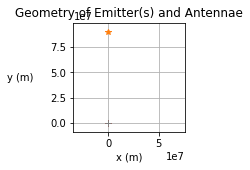

In [5]:
########
### Geometry Plot
########
ylabel_kw = {"rotation": "horizontal", "va":"center", "ha":"center", "labelpad": 30}

fig, axs = plt.subplots(1,1, figsize=(2,2))
axs = [ axs ]
i = 0
axs[i].grid()
axs[i].set_title("Geometry of Emitter(s) and Antennae")
axs[i].set_ylabel("y (m)", **ylabel_kw)
axs[i].set_xlabel("x (m)")
axs[i].plot(*source.x, '*', label="Emitter")

for j, ant in enumerate(antennae):
    axs[i].plot(*ant.x, '+', label="Antenna {}".format(j))

# make it a square plot
axs[i].set_aspect('equal', 'datalim')
axs[i].margins(0.1)

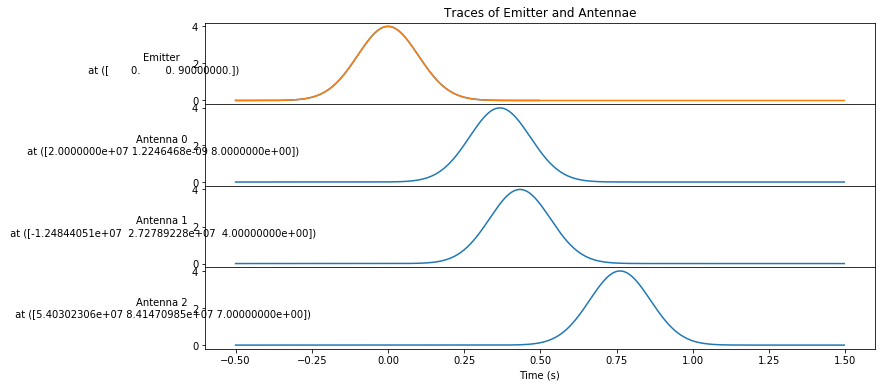

In [6]:
t_longoffset = t_offset
t_longstart = t_start
t_longend = 2*t_end
longtime = t_longoffset + np.arange(t_longstart, t_longend, 1/sample_rate) #s

########
### Plot Traces
########

fig, axs = plt.subplots(1+len(antennae),1, sharex=True, figsize=(12,6), gridspec_kw={"hspace":0})
axs[0].set_title("Traces of Emitter and Antennae")

# Emitter
i = 0
axs[i].set_ylabel("Emitter\n at ({})".format(source.x), **ylabel_kw)
axs[i].set_xlabel("Time (s)")
axs[i].plot(time, emitted(time))
axs[i].plot(longtime, emitted(longtime))

# Antenna
for j, ant in enumerate(antennae):
    i +=1
    axs[i].set_ylabel("Antenna {}\n at ({})".format(j, ant.x), **ylabel_kw)
    axs[i].plot(longtime, ant.recv(emitted)(longtime), label="Antenna {}".format(j))
    axs[i].set_xlabel("Time (s)")
    

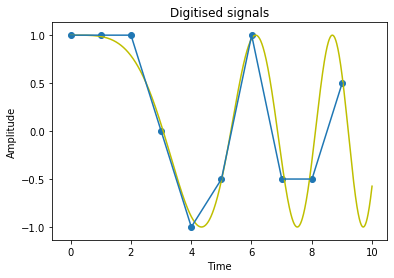

In [7]:
import numpy as np

import matplotlib.pyplot as plt
from lib.sampling import Digitizer

digit = Digitizer(sampling_frequency=1e1, resolution=0.5)

analog_samples = int(1e3)
analog_time = np.linspace(0, 10, analog_samples)
analog_signal = lambda t: np.cos(-t**2/6)

sample_time = digit.sample(analog_time, analog_samples)
quantised_signal = digit.digitise(analog_signal(sample_time))

fig, ax = plt.subplots()
ax.set_xlabel("Time")
ax.set_ylabel("Amplitude")
ax.set_title("Digitised signals")

ax.plot(analog_time, analog_signal(analog_time), 'y', label='Analog')
ax.plot(sample_time, quantised_signal)
ax.scatter(sample_time, quantised_signal)

plt.show();

### Combination Antennae and Digitizers

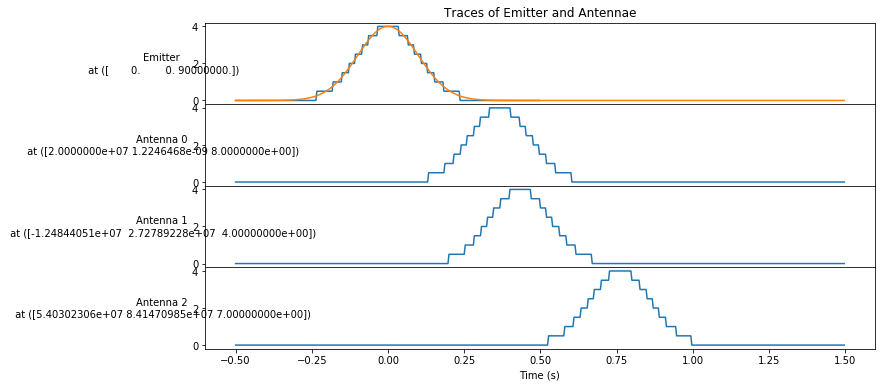

In [9]:
digit = Digitizer(sampling_frequency=1e1, resolution=0.5)

########
### Plot Traces
########

fig, axs = plt.subplots(1+len(antennae),1, sharex=True, figsize=(12,6), gridspec_kw={"hspace":0})
axs[0].set_title("Traces of Emitter and Antennae (digitised)")

# Emitter
i = 0
axs[i].set_ylabel("Emitter\n at ({})".format(source.x), **ylabel_kw)
axs[i].set_xlabel("Time (s)")
axs[i].plot(time, digit.digitise(emitted(time)))
axs[i].plot(longtime, emitted(longtime))

# Antenna
for j, ant in enumerate(antennae):
    i +=1
    axs[i].set_ylabel("Antenna {}\n at ({})".format(j, ant.x), **ylabel_kw)
    axs[i].plot(longtime, digit.digitise(ant.recv(emitted)(longtime)), label="Digitised Antenna {}".format(j))
    axs[i].set_xlabel("Time (s)")
    